## Exercise 6

In [14]:
using LightGraphs, Plots, Random, LinearAlgebra 

In [15]:
n = 200  # Number of nodes
radius = 0.125  # Connection radius
positions = [(rand(), rand()) for _ in 1:n] # Create random positions for the nodes

200-element Vector{Tuple{Float64, Float64}}:
 (0.8546644196960415, 0.4901283376191905)
 (0.11563942530309379, 0.8413523436055089)
 (0.39527665429108727, 0.6929185942884192)
 (0.46711196608940786, 0.24062125389824007)
 (0.10661020927066245, 0.7193631035174217)
 (0.6406165749806149, 0.4924816707245765)
 (0.22558069425771032, 0.5531545306666719)
 (0.13036779641008667, 0.21627885587359175)
 (0.4150489100447139, 0.009395184083591857)
 (0.9191850015208799, 0.4132396618830019)
 (0.6867145801747205, 0.47795886357753425)
 (0.4882516498137873, 0.6136857427894207)
 (0.1982468095019948, 0.08423788333273607)
 ⋮
 (0.3416848174202428, 0.06129265644617132)
 (0.7445984711984786, 0.5256590660664312)
 (0.6073023606857351, 0.7191932295864936)
 (0.444980195134028, 0.8075350611783003)
 (0.2535561723911809, 0.29490672028883824)
 (0.9367697951741784, 0.1688813744024088)
 (0.9969258945787897, 0.3680587661484278)
 (0.45915771299046326, 0.3366338477091051)
 (0.7778905188193219, 0.6393978804700218)
 (0.7407420443

In [16]:
g = SimpleGraph(n) # Create graph
for i in 1:n
    for j in (i+1):n
        if norm(positions[i] .- positions[j]) ≤ radius
            add_edge!(g, i, j)
        end
    end
end

In [17]:
center = (0.5, 0.5) # Find the node closest to the center (0.5, 0.5)
distances = [norm(p .- center) for p in positions]
center_node = argmin(distances)
path_lengths = dijkstra_shortest_paths(g, center_node).dists # Calculate the shortest path lengths from the central node

200-element Vector{Int64}:
 4
 6
 2
 3
 5
 2
 3
 5
 6
 5
 3
 1
 5
 ⋮
 5
 3
 3
 3
 3
 7
 6
 2
 4
 4
 5
 5

In [18]:
max_length = maximum(path_lengths) # Normalize the path lengths for color assignment
min_length = minimum(path_lengths)
scaled_lengths = (path_lengths .- min_length) * 10  # Avoid normalization over a too-small range -> scale distances to increase variability; multiplying by 10 to amplify the difference

200-element Vector{Int64}:
 40
 60
 20
 30
 50
 20
 30
 50
 60
 50
 30
 10
 50
  ⋮
 50
 30
 30
 30
 30
 70
 60
 20
 40
 40
 50
 50

In [19]:
max_scaled_length = maximum(scaled_lengths) # Recalculate max and min after scaling
min_scaled_length = minimum(scaled_lengths)

0

In [20]:
if max_scaled_length == min_scaled_length # Ensure the range is not zero
    normalized_lengths = zeros(n)
else
    normalized_lengths = (scaled_lengths .- min_scaled_length) / (max_scaled_length - min_scaled_length)
end

200-element Vector{Float64}:
 0.4444444444444444
 0.6666666666666666
 0.2222222222222222
 0.3333333333333333
 0.5555555555555556
 0.2222222222222222
 0.3333333333333333
 0.5555555555555556
 0.6666666666666666
 0.5555555555555556
 0.3333333333333333
 0.1111111111111111
 0.5555555555555556
 ⋮
 0.5555555555555556
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333
 0.7777777777777778
 0.6666666666666666
 0.2222222222222222
 0.4444444444444444
 0.4444444444444444
 0.5555555555555556
 0.5555555555555556

In [21]:
colormap = cgrad([:red, :white], 256)  # 256 shades between red and white
normalized_indices = round.(Int, normalized_lengths * 255) .+ 1  # Convert normalized values to color indices

200-element Vector{Int64}:
 114
 171
  58
  86
 143
  58
  86
 143
 171
 143
  86
  29
 143
   ⋮
 143
  86
  86
  86
  86
 199
 171
  58
 114
 114
 143
 143

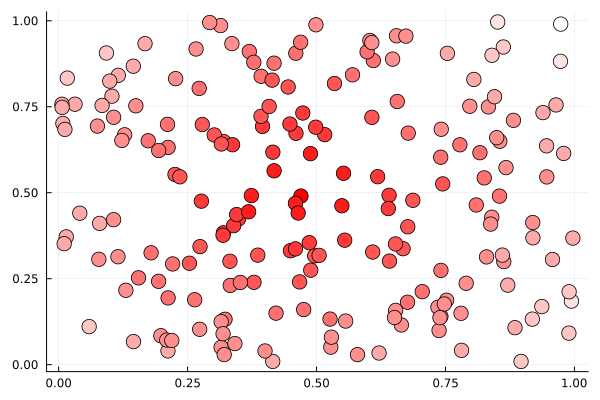

In [22]:
p = plot()
scatter!(
    [p[1] for p in positions], [p[2] for p in positions],
    c=[colormap[i] for i in normalized_indices],  # Using the normalized colors
    legend=false, markersize=8
)

In [23]:
for edge in edges(g) # Draw edges
    x1, y1 = positions[src(edge)]
    x2, y2 = positions[dst(edge)]
    plot!(p, [x1, x2], [y1, y2], color=:gray, alpha=0.5, linewidth=0.5)
end

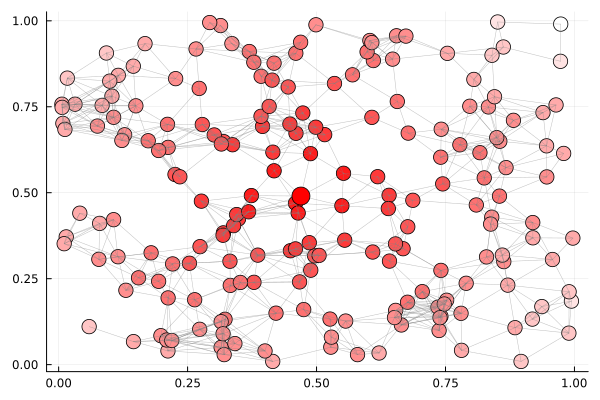

In [24]:
scatter!(p, [positions[center_node][1]], [positions[center_node][2]],
         color=:red, label="Nodo central", markersize=10)

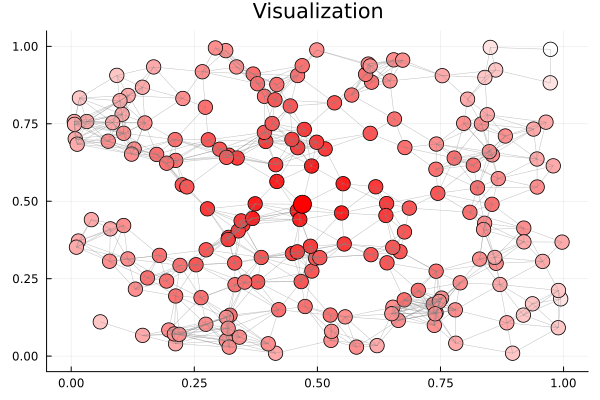

In [25]:
xlims!(p, -0.05, 1.05)
ylims!(p, -0.05, 1.05)
title!(p, "Visualization")

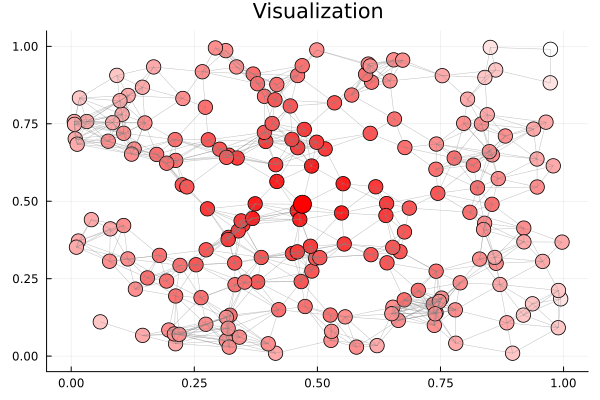

"/Users/michelletorres/random_geometric_graph.png"

In [26]:
display(p)
savefig(p, "random_geometric_graph.png")